# Predicting Player Market Value in FIFA 20

# Loading the Dataset

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [126]:
player_data = 'players_20.csv'
df = pd.read_csv(player_data)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


# Exploratory Data Analysis

In [118]:
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


In [119]:
#only selecting the columns I would be choosing in my models
#all selected columns are continuous, and have no NA values
relevant_columns = [
    'age', 'height_cm', 'weight_kg', 'overall',
    'potential', 'value_eur', 'wage_eur',
    'attacking_finishing', 'skill_dribbling', 'movement_reactions',
    'mentality_composure'
]
filtered_df = df[relevant_columns]
missing_values_count = filtered_df.isnull().sum()
print(missing_values_count)
print(filtered_df.head())
print(filtered_df.info())

age                    0
height_cm              0
weight_kg              0
overall                0
potential              0
value_eur              0
wage_eur               0
attacking_finishing    0
skill_dribbling        0
movement_reactions     0
mentality_composure    0
dtype: int64
   age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   attacking_finishing  skill_dribbling  movement_reactions  \
0                   95               97                  95   
1                   94               89                  96   
2                   87               96                  92   
3                   1

In [120]:
filtered_df.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,attacking_finishing,skill_dribbling,movement_reactions,mentality_composure
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,45.590218,55.596509,61.752544,58.528778
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,19.594609,18.929118,9.135613,11.880840
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,2.000000,4.000000,21.000000,12.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,30.000000,50.000000,56.000000,51.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,49.000000,61.000000,62.000000,60.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,62.000000,68.000000,68.000000,67.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,95.000000,97.000000,96.000000,96.000000


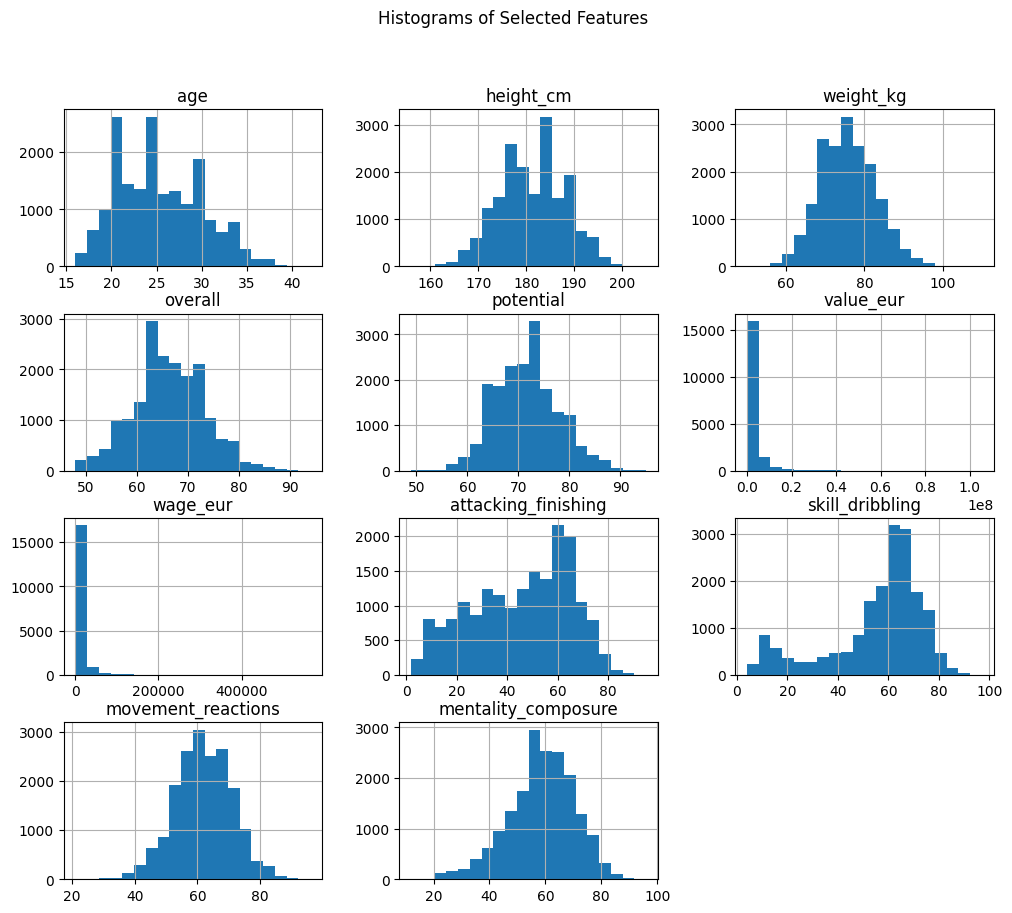

In [121]:
filtered_df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Selected Features")
plt.show()

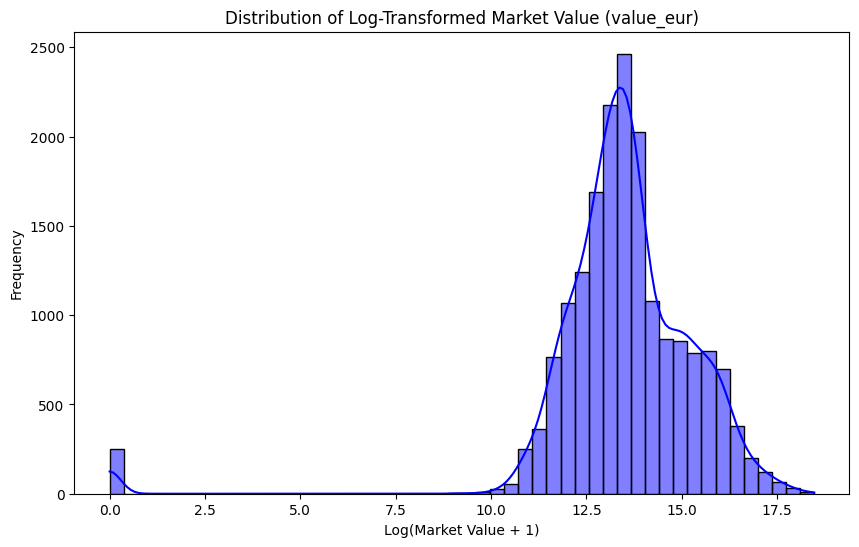

In [122]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(filtered_df['value_eur']), bins=50, kde=True, color='blue') #log1p to handle zero values
plt.title('Distribution of Log-Transformed Market Value (value_eur)')
plt.xlabel('Log(Market Value + 1)')
plt.ylabel('Frequency')
plt.show()

#### Initial Visualizations

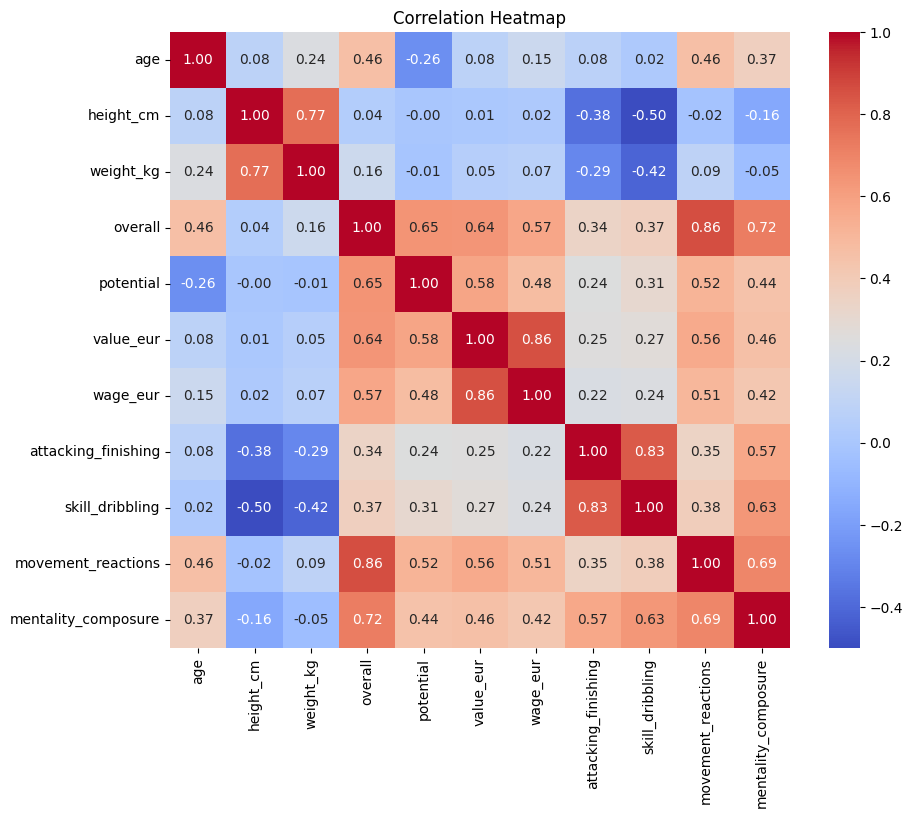

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

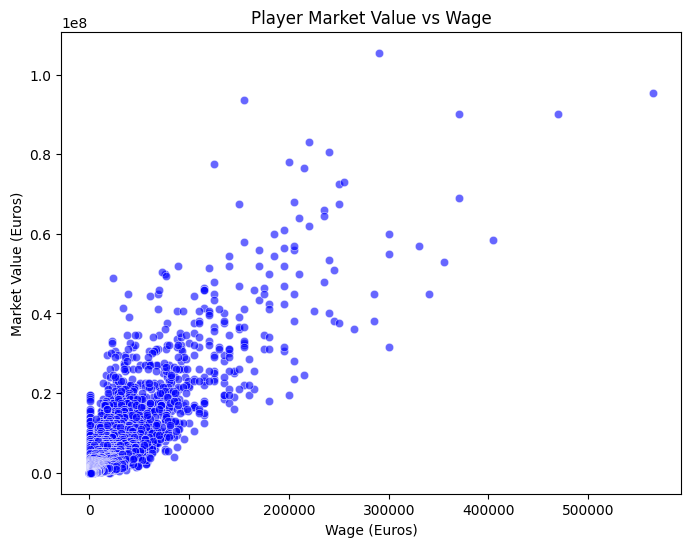

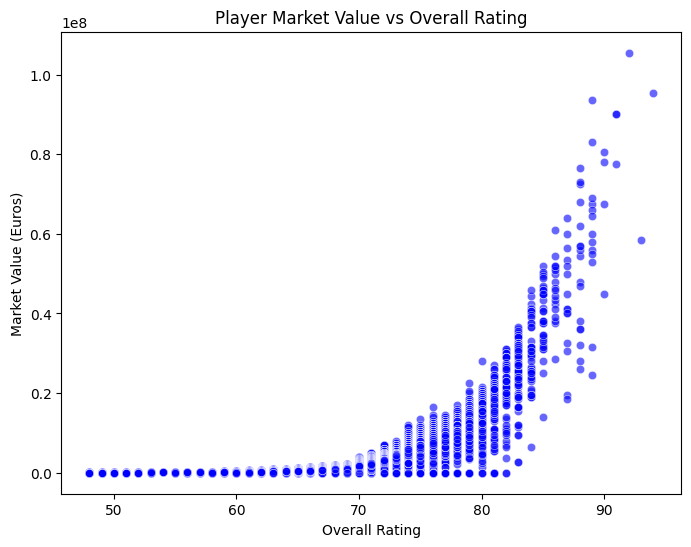

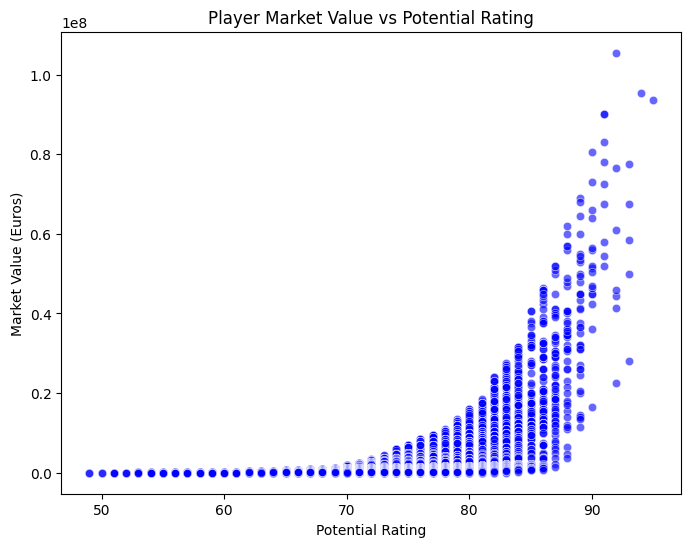

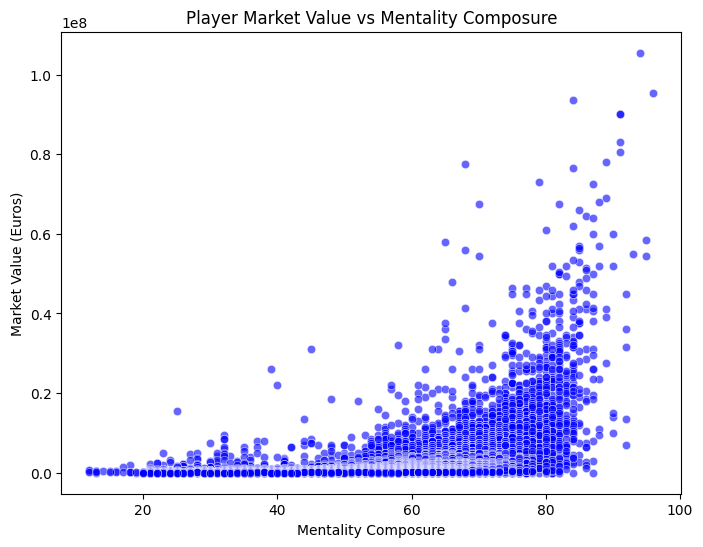

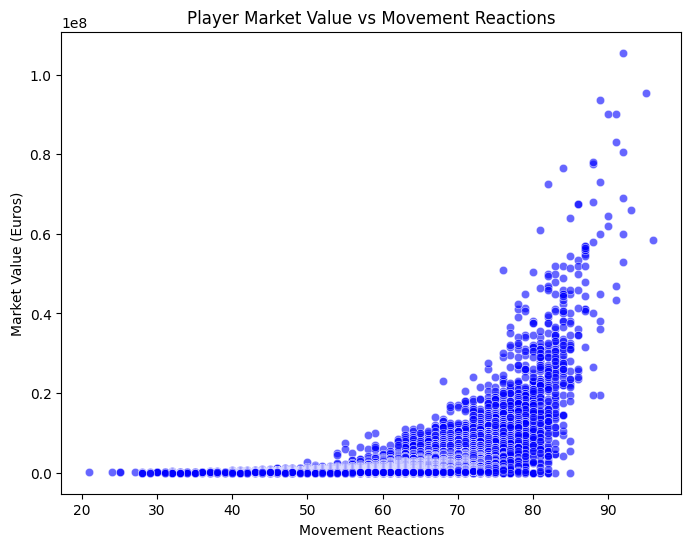

In [124]:
#scatterplots for most imporant variables (Strongest corr with value_eur)
def scatterplot(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=data, alpha=0.6, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

scatterplot('wage_eur', 'value_eur', filtered_df,
            'Player Market Value vs Wage', 'Wage (Euros)', 'Market Value (Euros)')

scatterplot('overall', 'value_eur', filtered_df,
            'Player Market Value vs Overall Rating', 'Overall Rating', 'Market Value (Euros)')

scatterplot('potential', 'value_eur', filtered_df,
            'Player Market Value vs Potential Rating', 'Potential Rating', 'Market Value (Euros)')

scatterplot('mentality_composure', 'value_eur', filtered_df,
            'Player Market Value vs Mentality Composure', 'Mentality Composure', 'Market Value (Euros)')

scatterplot('movement_reactions', 'value_eur', filtered_df,
            'Player Market Value vs Movement Reactions', 'Movement Reactions', 'Market Value (Euros)')


# Modeling and Interpretations

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

####Baseline Model

In [77]:
y = filtered_df['value_eur']
baseline_preds = np.ones(len(y))*y.mean()
baseline_mse = mean_squared_error(y, baseline_preds)
baseline_mse

31195891849332.703

In [80]:
baseline_rmse = np.sqrt(baseline_mse)
baseline_rmse

5585328.266926905

####Multiple Regression Model

In [70]:
X = filtered_df.drop(columns=['value_eur'])  #all columns except value_eur
y = filtered_df['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [81]:
multi_var_model = LinearRegression()
multi_var_model.fit(X_train, y_train)

#predictions on train and test sets
y_train_pred = multi_var_model.predict(X_train)
y_test_pred = multi_var_model.predict(X_test)


#rmse
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#coeffs and y-intercept
coefficients = multi_var_model.coef_
y_intercept = multi_var_model.intercept_

In [78]:
for idx, col in enumerate(X.columns):
    print(f"{col}: {coefficients[idx]:.4f}")
print(f"\nY-Intercept: {y_intercept:.4f}")

age: -238296.0481
height_cm: -7471.0675
weight_kg: -5514.5251
overall: 250288.4625
potential: -16442.1814
wage_eur: 181.5594
attacking_finishing: 11505.9241
skill_dribbling: -18961.2000
movement_reactions: 24332.7619
mentality_composure: 5905.3820

Y-Intercept: -8156375.3723


In [76]:
r = permutation_importance(multi_var_model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame(r['importances_mean'], index=X_train.columns, columns=['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", importance_df)

Feature Importance:
                      Importance
wage_eur               0.906842
overall                0.214367
age                    0.079352
skill_dribbling        0.011296
movement_reactions     0.003516
attacking_finishing    0.003193
potential              0.000995
height_cm              0.000161
mentality_composure    0.000076
weight_kg              0.000057


In [83]:
print("Multivariate Linear Regression Performance:")
print(f"Root Mean Squared Error (RMSE) on Training Set: {train_rmse:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {test_rmse:.2f}")

print(f"Training MSE Improvement: {baseline_rmse - train_rmse:.2f}")
print(f"Test MSE Improvement: {baseline_rmse - test_rmse:.2f}")

Multivariate Linear Regression Performance:
Root Mean Squared Error (RMSE) on Training Set: 2582326.74
Root Mean Squared Error (RMSE) on Test Set: 2418188.95
Training MSE Improvement: 3003001.52
Test MSE Improvement: 3167139.32


#### K-Nearest Neighbors Regression Model

In [86]:
X = filtered_df.drop(columns=['value_eur'])  #all columns except value_eur
y = filtered_df['value_eur']
scaler = StandardScaler()#to avoid unscaled features affecting KNN model
X_scaled = scaler.fit_transform(X)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

In [87]:
print("\nPerforming Grid Search for K-Nearest Neighbors Regression:")
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 50]
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_knn, y_train_knn)


Performing Grid Search for K-Nearest Neighbors Regression:
Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
best_params = grid_search.best_params_
print("Best Parameters for KNN:", best_params)

Best Parameters for KNN: {'knn__n_neighbors': 5}


In [90]:
best_knn = grid_search.best_estimator_
y_knn_train_pred = best_knn.predict(X_train_knn)
y_knn_test_pred = best_knn.predict(X_test_knn)

test_rmse_knn = np.sqrt(mean_squared_error(y_test_knn, y_knn_test_pred))
train_rmse_knn = np.sqrt(mean_squared_error(y_train_knn, y_knn_train_pred))

In [97]:
print(f"Root Mean Squared Error (RMSE) for KNN on Training Set: {train_rmse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE) for KNN on Test Set: {test_rmse_knn:.2f}")

print(f"Training MSE Improvement: {baseline_rmse - train_rmse_knn:.2f}")
print(f"Test MSE Improvement: {baseline_rmse - test_rmse_knn:.2f}")
print(train_rmse_knn<train_rmse)
test_rmse_knn<test_rmse

Root Mean Squared Error (RMSE) for KNN on Training Set: 1342925.14
Root Mean Squared Error (RMSE) for KNN on Test Set: 1472397.31
Training MSE Improvement: 4242403.13
Test MSE Improvement: 4112930.96
True


True

In [100]:
train_rmse_knn<test_rmse_knn

True

In [98]:
r = permutation_importance(best_knn, X_test_knn, y_test_knn, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
importance_df = pd.DataFrame(r['importances_mean'], index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

print("Feature Importance for KNN Model:")
print(importance_df)

Feature Importance for KNN Model:
                       Importance
wage_eur             7.612754e+12
potential            6.467743e+12
overall              5.850223e+12
movement_reactions   2.305977e+12
mentality_composure  1.141860e+12
age                  9.033864e+11
attacking_finishing  7.575629e+11
skill_dribbling      4.214835e+11
weight_kg            1.537264e+11
height_cm            1.266178e+11


#### Decision Tree Regression Model

In [101]:
#test and train for this model
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

#finding optimal max depth
param_grid_tree = {
    'max_depth': [2, 5, 10, 15, 20, 25]
}

tree_model = DecisionTreeRegressor(random_state=42)
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_tree.fit(X_train_tree, y_train_tree)

#best parameter for max_depth
best_tree_params = grid_search_tree.best_params_
print("Best Parameters for Decision Tree:", best_tree_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Decision Tree: {'max_depth': 20}


In [102]:
best_tree_model = grid_search_tree.best_estimator_
best_tree_model.fit(X_train_tree, y_train_tree)

#predictions on test and train
y_tree_train_pred = best_tree_model.predict(X_train_tree)
y_tree_test_pred = best_tree_model.predict(X_test_tree)

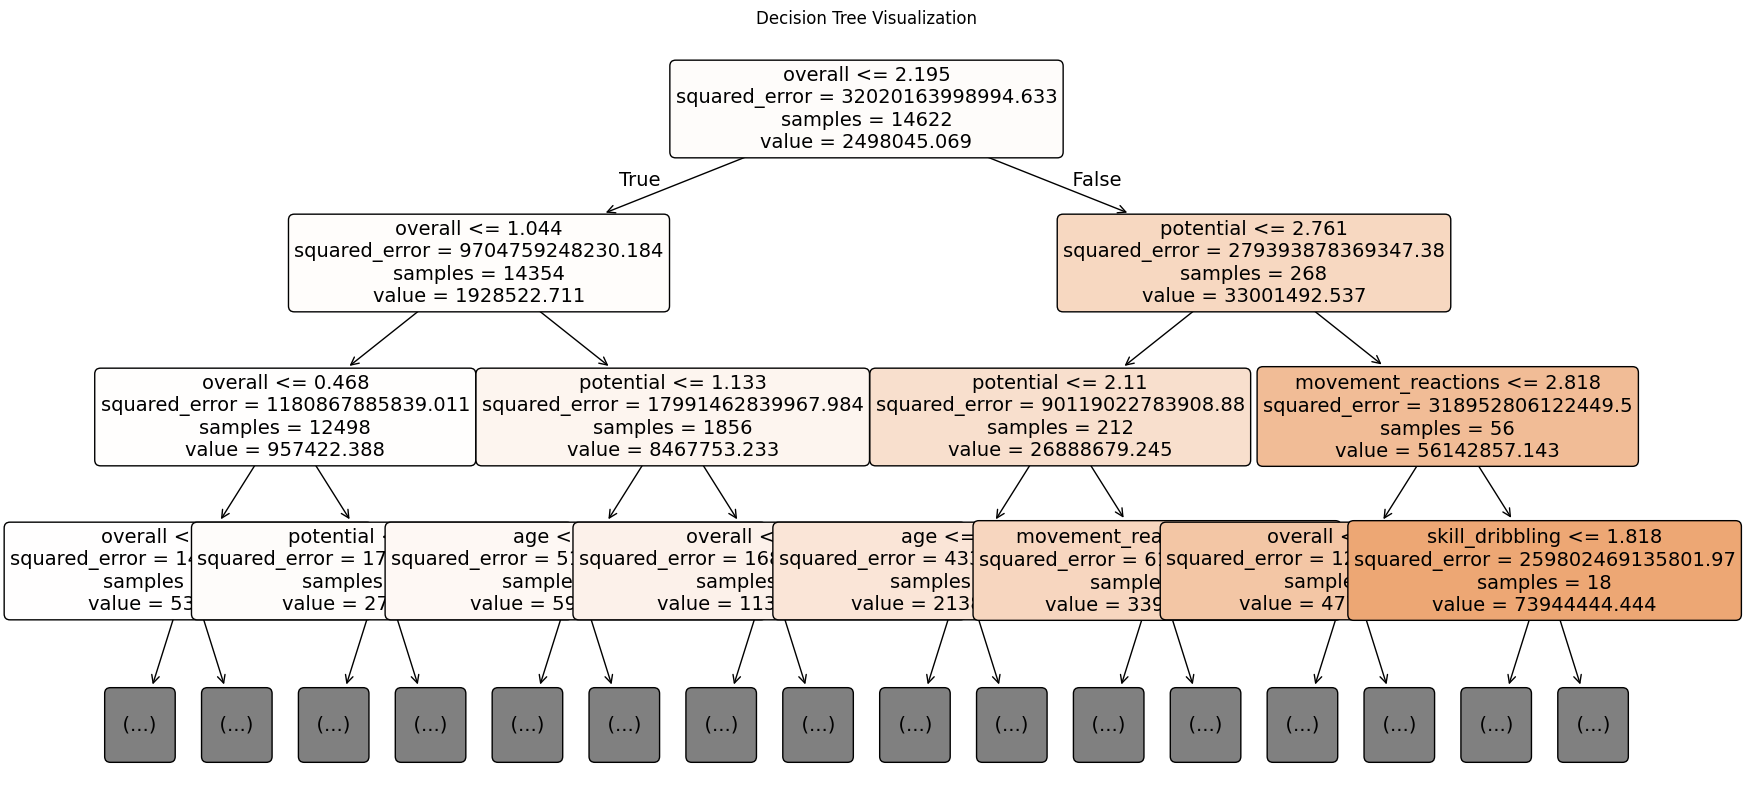

In [111]:
plt.figure(figsize=(20,10))
#max depth set to three because 20 taking too long to render and show very tiny
plot_tree(best_tree_model, feature_names=X.columns, filled=True, rounded=True, max_depth = 3, fontsize=14)
plt.title("Decision Tree Visualization")
plt.show()

In [105]:
tree_train_rmse = np.sqrt(mean_squared_error(y_train_tree, y_tree_train_pred))
tree_test_rmse = np.sqrt(mean_squared_error(y_test_tree, y_tree_test_pred))

print(f"Root Mean Squared Error (RMSE) for Decision Tree on Training Set: {tree_train_rmse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Decision Tree on Test Set: {tree_test_rmse:.2f}")
print(f"Training MSE Improvement: {baseline_rmse - tree_train_rmse:.2f}")
print(f"Test MSE Improvement: {baseline_rmse - tree_test_rmse:.2f}")
tree_test_rmse<test_mse_knn

Root Mean Squared Error (RMSE) for Decision Tree on Training Set: 1694.99
Root Mean Squared Error (RMSE) for Decision Tree on Test Set: 870940.28
Training MSE Improvement: 5583633.28
Test MSE Improvement: 4714387.99


True

In [107]:
feature_importances = pd.DataFrame(best_tree_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Decision Tree Model:")
print(feature_importances)


Feature Importance for Decision Tree Model:
                     Importance
overall                0.779804
potential              0.147190
age                    0.023304
movement_reactions     0.021458
wage_eur               0.009196
skill_dribbling        0.007748
attacking_finishing    0.004864
mentality_composure    0.003854
height_cm              0.001334
weight_kg              0.001249


#### Random Forest Regression Model

In [112]:
#test and train for rf
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

#optimal parameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_rf, y_train_rf)

#best parameters shown
best_rf_params = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_rf_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


In [113]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_rf, y_train_rf)

#predictions
y_rf_train_pred = best_rf_model.predict(X_train_rf)
y_rf_test_pred = best_rf_model.predict(X_test_rf)

In [117]:
rf_train_rmse = np.sqrt(mean_squared_error(y_train_rf, y_rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test_rf, y_rf_test_pred))

print(f"Root Mean Squared Error (RMSE) for Random Forest on Training Set: {rf_train_rmse:.2f}")
print(f"Root Mean Squared Error (RMSE) for Random Forest on Test Set: {rf_test_rmse:.2f}")
print(f"Training MSE Improvement: {baseline_rmse - rf_train_rmse:.2f}")
print(f"Test MSE Improvement: {baseline_rmse - rf_test_rmse:.2f}")
tree_test_rmse>rf_test_rmse

Root Mean Squared Error (RMSE) for Random Forest on Training Set: 273770.22
Root Mean Squared Error (RMSE) for Random Forest on Test Set: 538946.89
Training MSE Improvement: 5311558.05
Test MSE Improvement: 5046381.38


True

In [115]:
rf_feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Random Forest Model:")
print(rf_feature_importances)


Feature Importance for Random Forest Model:
                     Importance
overall                0.822469
potential              0.115742
age                    0.022545
wage_eur               0.009977
skill_dribbling        0.008295
attacking_finishing    0.007880
movement_reactions     0.007831
mentality_composure    0.002416
weight_kg              0.001750
height_cm              0.001095
